In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score, r2_score
from sklearn.cross_validation import train_test_split
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
import xgboost as xgb
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
from preprocess import AmazonReviews

In [3]:
data = AmazonReviews(max_words=1500, is_regression=True)

In [4]:
data.X.shape

(292026, 1504)

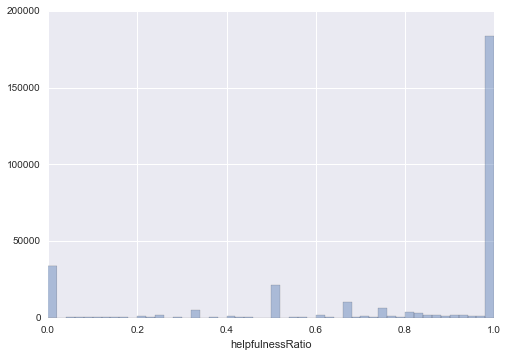

In [9]:
# Distribution of helpfulness ratios
sb.distplot(data.Y, kde=False)

In [6]:
xtrain, xtest, ytrain, ytest = train_test_split(data.X, data.Y, train_size=0.80)

In [7]:
model = RandomForestRegressor(n_estimators=10)

In [8]:
model.fit(xtrain, ytrain)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [9]:
ypred = model.predict(xtest)

In [10]:
r2_score(ytest, ypred)

0.41644318651914647

In [10]:
# Change task to classification
data.regression = False

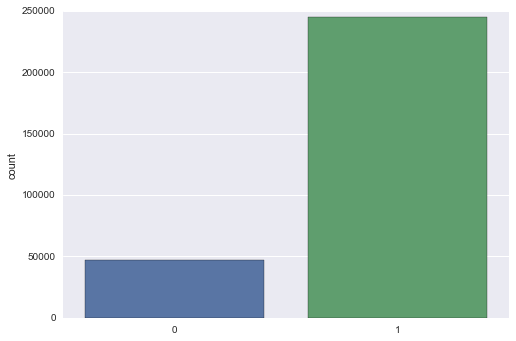

In [11]:
# Distribution of helpfulness "classes"
sb.countplot(x=data.Y)

In [16]:
xtrain, xtest, ytrain, ytest = train_test_split(data.X, data.Y, train_size=0.80, stratify=data.Y)

In [46]:
model3 = RandomForestClassifier(n_estimators=25, oob_score=True, verbose=2)

In [ ]:
model3.fit(xtrain, ytrain)

In [ ]:
ypred3 = model3.predict(xtest)

In [ ]:
roc_auc_score(ytest, ypred3)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest, ypred3)

In [ ]:
# Feature importances
sb.set_context('poster', rc={'figure.figsize':(8, 8)})
importances = sorted(zip(data.X.columns, np.abs(model3.feature_importances_)), key=lambda x: x[1], reverse=True)
features, values = zip(*importances[:25])
sb.barplot(x=values, y=features, orient='h', color='g')